# Importing Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import sys

In [2]:
sys.path.append('D:\Machine Learning\Ironhack\GitHub\IronEnrique')

In [3]:
from Modules.Transforms import my_transformations
from Modules.Performance import perf_classification

# Functions

In [4]:
# Function to store in dictionary the number of nan values per column

def nan_counter(df):
    
    """
    Returns a dictionary containing the number of nan values per column (for dataframe df)

    Parameters
    ----------
    df : Pandas dataframe

    Returns
    -------
    remaining_nan : Dictionary
        Contains the number of nan values in each column of the dataframe

    """
    
    remaining_nan = {}

    for column in df.columns:

        remaining_nan[column] = df[column][df[column].isna() == True].size

    return remaining_nan

# Loading the data

In [5]:
churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")

# Checking the Data

In [6]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [7]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [8]:
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors="coerce")

In [9]:
churnData = pd.concat([churnData._get_numeric_data(), churnData.select_dtypes("object").astype("category")], axis=1)

In [10]:
churnData.loc[:,"SeniorCitizen"] = churnData.loc[:,"SeniorCitizen"].astype("category")

In [11]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SeniorCitizen     7043 non-null   category
 1   tenure            7043 non-null   int64   
 2   MonthlyCharges    7043 non-null   float64 
 3   TotalCharges      7032 non-null   float64 
 4   gender            7043 non-null   category
 5   Partner           7043 non-null   category
 6   Dependents        7043 non-null   category
 7   PhoneService      7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  Churn             7043 non-null   category
dtypes: category(13), float64

In [12]:
nan_counter(churnData)

{'SeniorCitizen': 0,
 'tenure': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 11,
 'gender': 0,
 'Partner': 0,
 'Dependents': 0,
 'PhoneService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'Churn': 0}

In [13]:
churnData["TotalCharges"] = churnData["TotalCharges"].fillna(np.mean(churnData["TotalCharges"]))

In [14]:
nan_counter(churnData)

{'SeniorCitizen': 0,
 'tenure': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 0,
 'gender': 0,
 'Partner': 0,
 'Dependents': 0,
 'PhoneService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'Churn': 0}

In [15]:
churnData["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [16]:
ord_dict = {"Contract": ["Month-to-month", "One year", "Two year"]}

# Logistic Regression

In [17]:
x = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = churnData["Churn"]

In [18]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler="standard", categorical=True)
train = transformed["train"]
test = transformed["test"]

In [19]:
train[1]

,SeniorCitizen
0,0
1,1
2,0
3,0
4,0
...,...
5629,0
5630,0
5631,0
5632,1


In [20]:
x_train = pd.concat([train[0], train[1]], axis=1)
y_train = train[3]
x_test = pd.concat([test[0], test[1]], axis=1)
y_test = test[3]

In [21]:
x_train

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1.612532,0.674154,1.704560,0
1,-0.747907,-0.614894,-0.711711,1
2,1.571835,-1.335097,-0.210251,0
3,0.025340,0.301578,0.051750,0
4,0.595101,1.128231,0.989863,0
...,...,...,...,...
5629,-0.707210,1.284580,-0.329573,0
5630,-0.910696,0.873748,-0.583178,0
5631,1.042771,-1.466497,-0.485517,0
5632,-1.276971,0.163525,-0.977436,1


In [22]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_pred_train = pd.DataFrame(model.predict(x_train))
y_pred_test = pd.DataFrame(model.predict(x_test))

Confusion matrix for the train set
-----------------


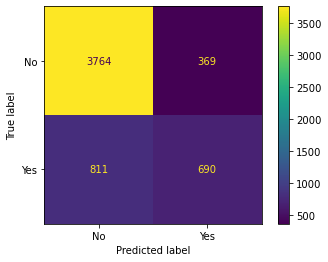

Confusion matrix for the test set
-----------------


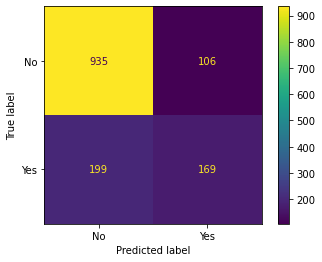

In [24]:
performance_log = perf_classification(y_train, y_test, y_pred_train, y_pred_test, pos_label="Yes", plot=True)

In [25]:
display(performance_log["performance"])

,Train,Test
Error_metric,,
Accuracy,0.790557,0.783534
Precision,0.651558,0.614545
Recall,0.459694,0.459239


# Decision Tree Classifier - default arguments

In [26]:
x = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = churnData["Churn"]

In [27]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler=None, categorical=True)
train = transformed["train"]
test = transformed["test"]

In [28]:
x_train = pd.concat([train[0], train[1]], axis=1)
y_train = train[3]
x_test = pd.concat([test[0], test[1]], axis=1)
y_test = test[3]

In [29]:
x_train

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,72,85.10,6155.40,0
1,14,46.35,672.70,1
2,71,24.70,1810.55,0
3,33,73.90,2405.05,0
4,47,98.75,4533.70,0
...,...,...,...,...
5629,15,103.45,1539.80,0
5630,10,91.10,964.35,0
5631,58,20.75,1185.95,0
5632,1,69.75,69.75,1


In [30]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred_train = model.predict(x_train)
y_pred_test  = model.predict(x_test)

Confusion matrix for the train set
-----------------


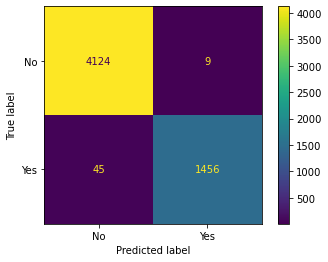

Confusion matrix for the test set
-----------------


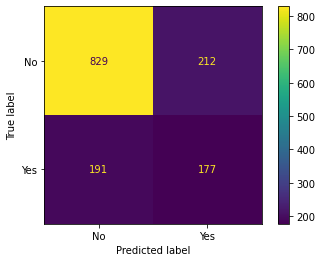

In [32]:
performance_tree = perf_classification(y_train, y_test, y_pred_train, y_pred_test, pos_label="Yes", plot=True)

In [33]:
display(performance_tree["performance"])

,Train,Test
Error_metric,,
Accuracy,0.990415,0.713982
Precision,0.993857,0.455013
Recall,0.970020,0.480978


The model is overfitting, too much complexity

In [34]:
model.get_depth()

35

# Decision Tree Classifier - playing with the arguments

In [35]:

for n in range(2, 10):
    
    
    model = DecisionTreeClassifier(max_depth=n)
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    performance_tree = perf_classification(y_train, y_test, y_pred_train, y_pred_test, pos_label="Yes", plot=False)
    index = [[f'depth={n}', f'depth={n}'],["Train", "Test"]]
    performance_tree["performance"].columns = index
    
    if n == 2:
        
        results_df = performance_tree["performance"]
        
    else:
        
        results_df = pd.concat([results_df, performance_tree["performance"]], axis=1)


In [36]:
results_df

depth=2             depth=3             depth=4            \
                 Train      Test     Train      Test     Train      Test   
Error_metric                                                               
Accuracy      0.786830  0.775018  0.786830  0.775018  0.791977  0.778566   
Precision     0.661290  0.613333  0.661290  0.613333  0.672251  0.616667   
Recall        0.409727  0.375000  0.409727  0.375000  0.427715  0.402174   

               depth=5             depth=6             depth=7            \
                 Train      Test     Train      Test     Train      Test   
Error_metric                                                               
Accuracy      0.801562  0.776437  0.806532  0.771469  0.818069  0.769340   
Precision     0.679139  0.598513  0.675491  0.576667  0.709507  0.573379   
Recall        0.483678  0.437500  0.526982  0.470109  0.536975  0.456522   

               depth=8             depth=9            
                 Train      Test     Train      Test  
Error_metric                                          
Accuracy      0.830138  0.757984  0.843450  0.763662  
Precision     0.714173  0.541538  0.769834  0.562278  
Recall        0.604264  0.478261  0.588274  0.429348

In [37]:
depth = 3
model_d = DecisionTreeClassifier(max_depth=depth)
model_d.fit(x_train, y_train)
y_pred_train = model_d.predict(x_train)
y_pred_test = model_d.predict(x_test)
performance_tree_d = perf_classification(y_train, y_test, y_pred_train, y_pred_test, pos_label="Yes", plot=False)
display(performance_tree_d["performance"])

,Train,Test
Error_metric,,
Accuracy,0.786830,0.775018
Precision,0.661290,0.613333
Recall,0.409727,0.375000


In [38]:
x_train

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,72,85.10,6155.40,0
1,14,46.35,672.70,1
2,71,24.70,1810.55,0
3,33,73.90,2405.05,0
4,47,98.75,4533.70,0
...,...,...,...,...
5629,15,103.45,1539.80,0
5630,10,91.10,964.35,0
5631,58,20.75,1185.95,0
5632,1,69.75,69.75,1


In [39]:
model_d

DecisionTreeClassifier(max_depth=3)

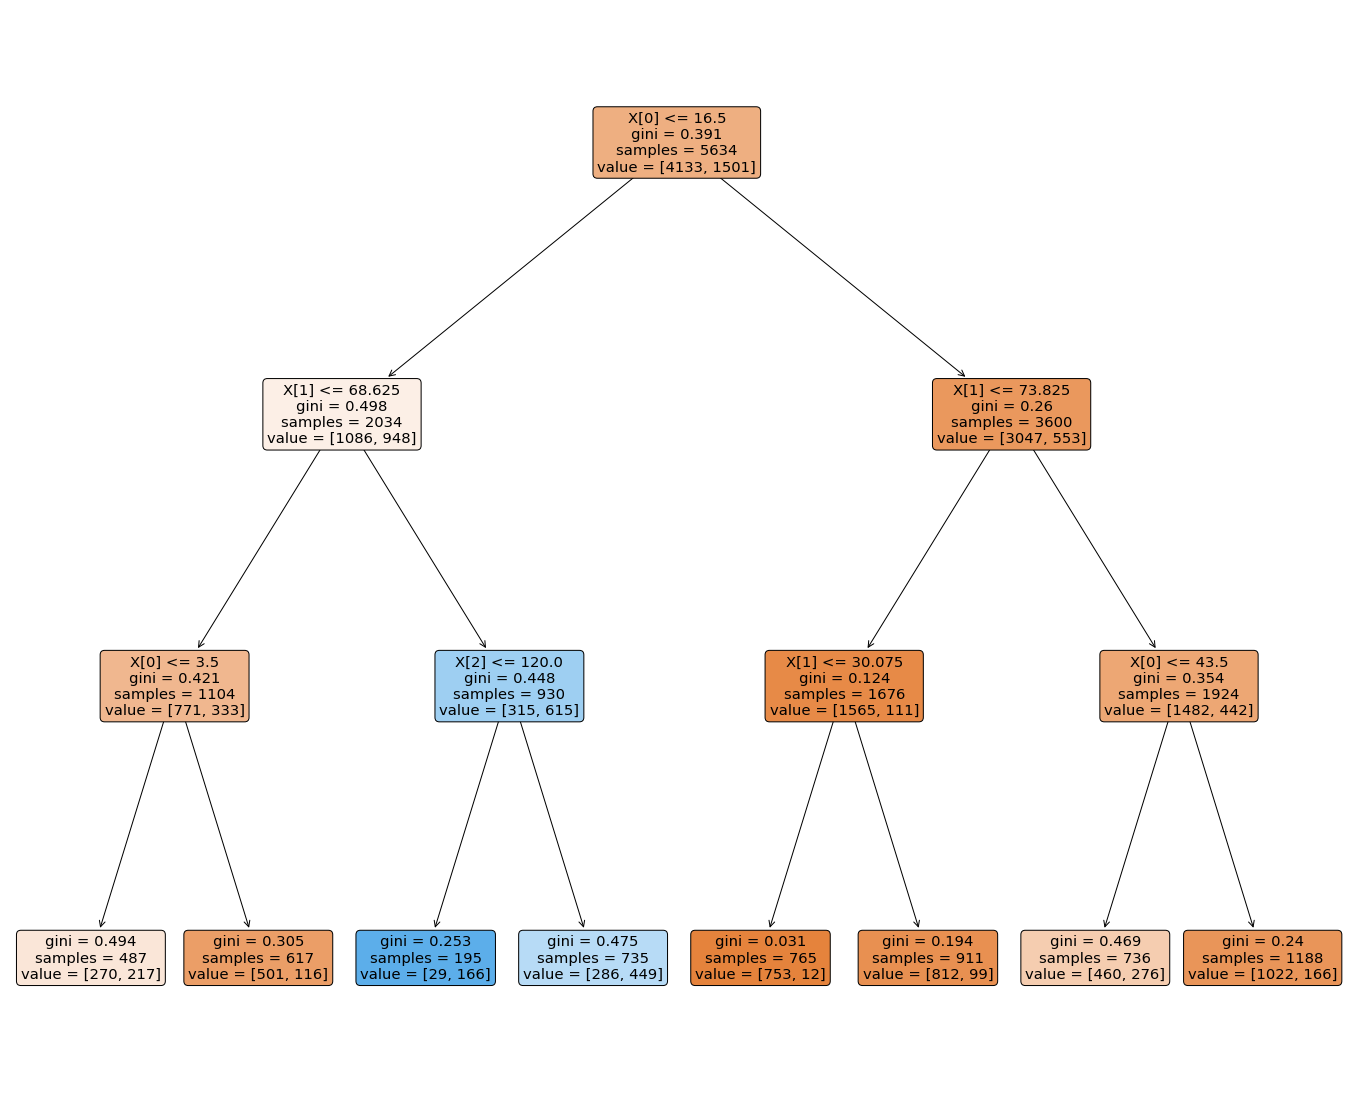

In [40]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (24,20))

plot_tree(model_d, filled = True, rounded=True)
plt.show() 

In [41]:
min_leafs = 500
model_l = DecisionTreeClassifier(min_samples_leaf = min_leafs)
model_l.fit(x_train, y_train)
y_pred_train = model_l.predict(x_train)
y_pred_test = model_l.predict(x_test)
performance_tree_l = perf_classification(y_train, y_test, y_pred_train, y_pred_test, pos_label="Yes", plot=False)
display(performance_tree_l["performance"])

,Train,Test
Error_metric,,
Accuracy,0.786830,0.775018
Precision,0.661290,0.613333
Recall,0.409727,0.375000


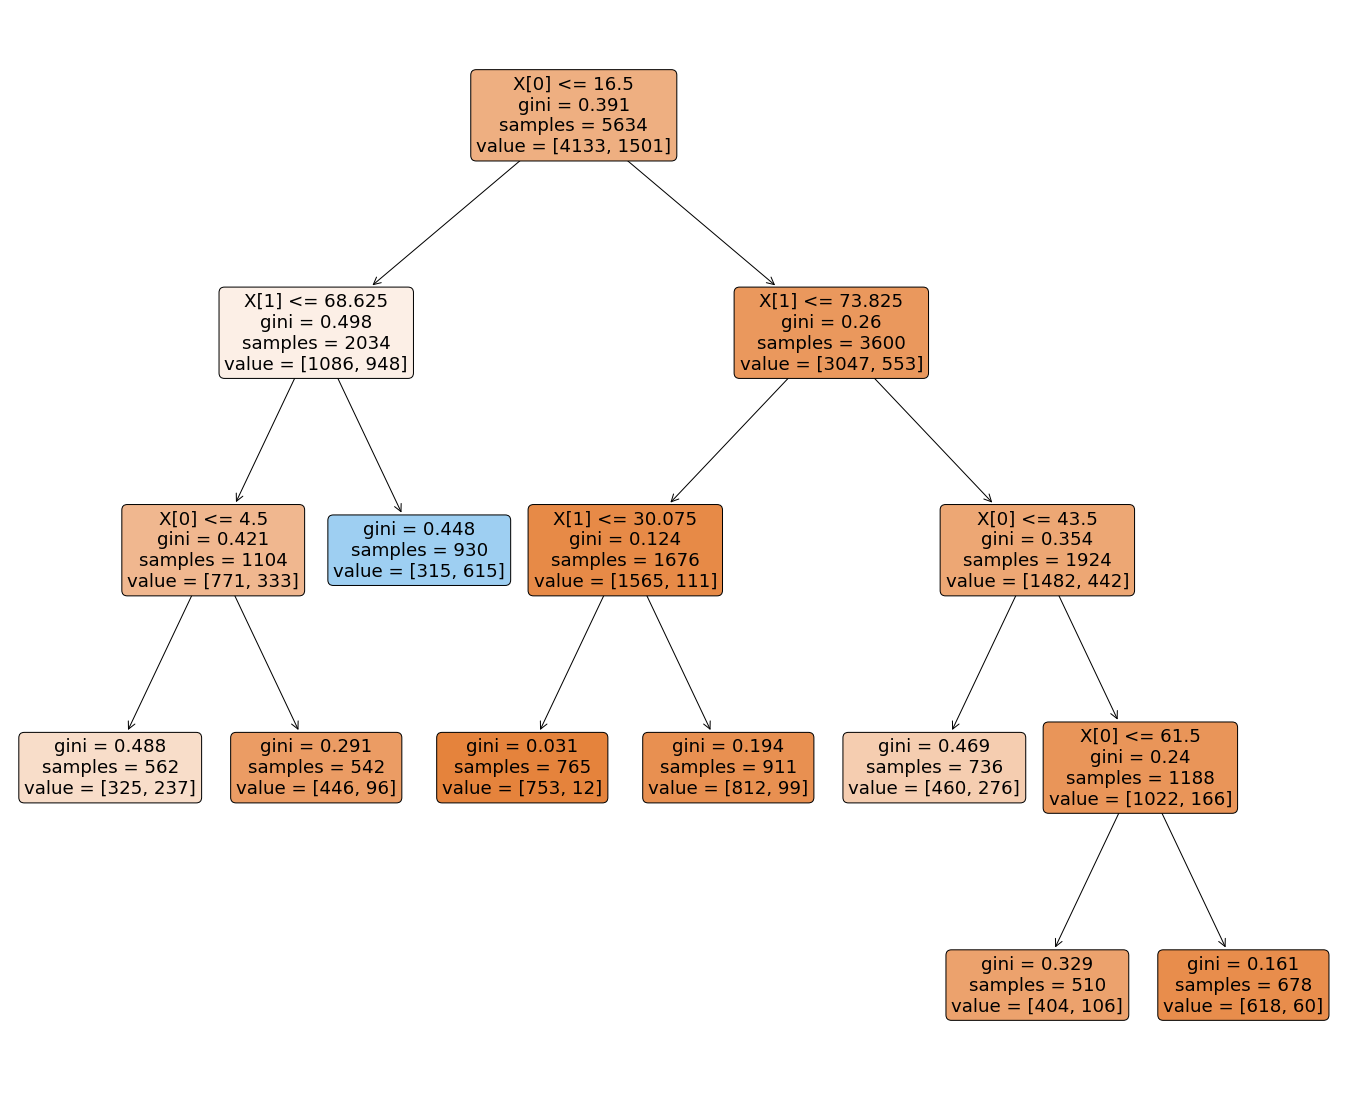

In [42]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (24,20))

plot_tree(model_l, filled = True, rounded=True)
plt.show() 

# Decision Tree Classifier - all variables

In [43]:
y = churnData["Churn"]
x = churnData.drop("Churn", axis=1)

In [44]:
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
0,0,1,29.85,29.85,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month
1,0,34,56.95,1889.50,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year
2,0,2,53.85,108.15,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month
3,0,45,42.30,1840.75,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year
4,0,2,70.70,151.65,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year
7039,0,72,103.20,7362.90,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year
7040,0,11,29.60,346.45,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month
7041,1,4,74.40,306.60,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month


In [45]:
ord_dict = {"gender": ["Female", "Male"], "Partner": ["No", "Yes"], "Dependents": ["No", "Yes"], "PhoneService": ["No", "Yes"]
            , "Contract": ["Month-to-month", "One year", "Two year"]
            }

nom_list = ["TechSupport", "StreamingTV", "StreamingMovies", "DeviceProtection", "OnlineBackup", "OnlineSecurity"] 

In [46]:
transformed = my_transformations(x, y, test_size=0.2, numerical=True, scaler=None, categorical=True, ordinal_dict=ord_dict, nominal_list=nom_list)
train = transformed["train"]
test = transformed["test"]

C:\Users\ehern\miniconda3\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)
C:\Users\ehern\miniconda3\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [69]:
train = transformed["train"]
test = transformed["test"]

In [70]:
train[2]

,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,0,1,0,1,0,1,0,1,0,1,0,1
1,0,0,0,1,0,1,0,0,0,0,0,0
2,1,0,1,0,1,0,1,0,1,0,1,0
3,0,1,0,1,0,1,0,1,0,0,0,0
4,0,0,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0,1,0,1,0,1,0,1,0,0,0,0
5630,0,1,0,1,0,0,0,1,0,0,0,0
5631,1,0,1,0,1,0,1,0,1,0,1,0
5632,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
x_train = pd.concat([train[0], train[1], train[2]], axis=1)
y_train = train[3]
x_test = pd.concat([test[0], test[1], test[2]], axis=1)
y_test = test[3]

In [72]:
x_train

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender,Partner,Dependents,PhoneService,Contract,TechSupport_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,72,85.10,6155.40,0,0.0,1.0,0.0,1.0,2.0,0,...,0,1,0,1,0,1,0,1,0,1
1,14,46.35,672.70,1,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,1,0,0,0,0,0,0
2,71,24.70,1810.55,0,0.0,1.0,1.0,1.0,2.0,1,...,1,0,1,0,1,0,1,0,1,0
3,33,73.90,2405.05,0,1.0,1.0,1.0,1.0,1.0,0,...,0,1,0,1,0,1,0,0,0,0
4,47,98.75,4533.70,0,0.0,1.0,0.0,1.0,0.0,0,...,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,15,103.45,1539.80,0,1.0,1.0,0.0,1.0,0.0,0,...,0,1,0,1,0,1,0,0,0,0
5630,10,91.10,964.35,0,0.0,0.0,1.0,1.0,0.0,0,...,0,1,0,0,0,1,0,0,0,0
5631,58,20.75,1185.95,0,1.0,1.0,0.0,1.0,2.0,1,...,1,0,1,0,1,0,1,0,1,0
5632,1,69.75,69.75,1,1.0,0.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


Confusion matrix for the train set
-----------------


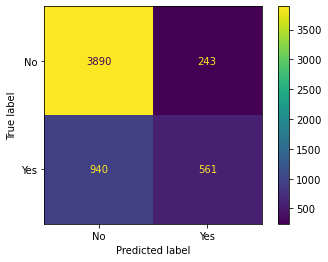

Confusion matrix for the test set
-----------------


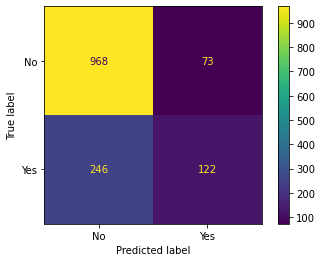

,Train,Test
Error_metric,,
Accuracy,0.790025,0.773598
Precision,0.697761,0.625641
Recall,0.373751,0.331522


In [81]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
performance_tree = perf_classification(y_train, y_test, y_pred_train, y_pred_test, pos_label="Yes", plot=True)
display(performance_tree["performance"])

In [82]:
model.get_depth()

3

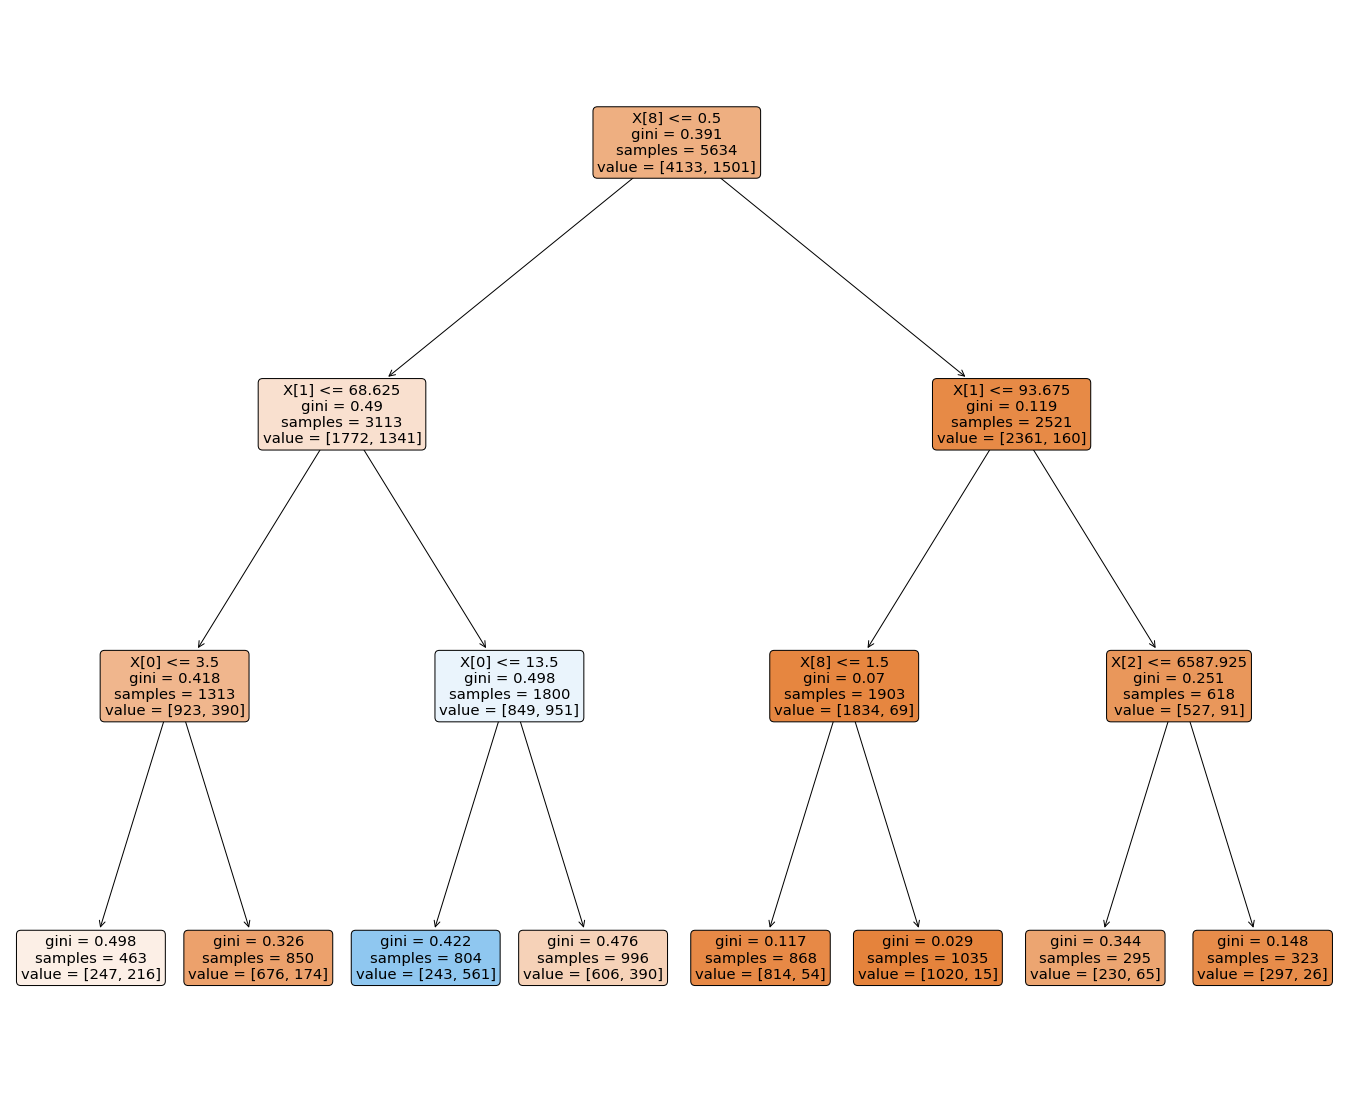

In [83]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (24,20))

plot_tree(model, filled = True, rounded=True)
plt.show() 